In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv('/content/BTC-USD (2).csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Splitting into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Evaluation
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Loss: {train_loss:.4f}')

test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions)
y_train = y_train.reshape(-1, 1)  # Reshape y_train to match the expected shape
y_train = scaler.inverse_transform(y_train)

test_predictions = scaler.inverse_transform(test_predictions)
y_test = y_test.reshape(-1, 1)  # Reshape y_test to match the expected shape
y_test = scaler.inverse_transform(y_test)

# Print the first 10 predictions
print('Train Predictions:')
print(train_predictions[:10].flatten())
print('')

print('Test Predictions:')
print(test_predictions[:10].flatten())


Epoch 1/10
135/135 [==============================] - 2s 6ms/step - loss: 8.4953e-04
Epoch 2/10
135/135 [==============================] - 1s 8ms/step - loss: 6.6189e-05
Epoch 3/10
135/135 [==============================] - 1s 8ms/step - loss: 6.3351e-05
Epoch 4/10
135/135 [==============================] - 1s 8ms/step - loss: 6.3594e-05
Epoch 5/10
135/135 [==============================] - 1s 8ms/step - loss: 6.3656e-05
Epoch 6/10
135/135 [==============================] - 1s 6ms/step - loss: 5.3753e-05
Epoch 7/10
135/135 [==============================] - 1s 8ms/step - loss: 5.2409e-05
Epoch 8/10
135/135 [==============================] - 1s 6ms/step - loss: 5.0948e-05
Epoch 9/10
135/135 [==============================] - 1s 6ms/step - loss: 5.0669e-05
Epoch 10/10
135/135 [==============================] - 1s 6ms/step - loss: 4.5675e-05
Train Loss: 0.0000
Test Loss: 0.0037
17/17 [==============================] - 0s 4ms/step
Train Predictions:
[373.99026 371.1635  365.498   360.77548

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

# Load the dataset
data = pd.read_csv('/content/BTC-USD (2).csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Splitting into train and test sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Convert data into sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training
model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1)

# Evaluation
train_loss = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Loss: {train_loss:.4f}')

test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions)
train_actual = scaler.inverse_transform(y_train)

test_predictions = scaler.inverse_transform(test_predictions)
test_actual = scaler.inverse_transform(y_test)

# Print the first 10 predictions
print('Train Predictions:')
print(train_predictions[:10].flatten())
print('')
print('Train Actual:')
print(train_actual[:10].flatten())
print('')

print('Test Predictions:')
print(test_predictions[:10].flatten())
print('')
print('Test Actual:')
print(test_actual[:10].flatten())



Epoch 1/10
135/135 [==============================] - 2s 4ms/step - loss: 4.8367e-05
Epoch 2/10
135/135 [==============================] - 0s 3ms/step - loss: 2.9291e-05
Epoch 3/10
135/135 [==============================] - 1s 4ms/step - loss: 2.6954e-05
Epoch 4/10
135/135 [==============================] - 1s 4ms/step - loss: 2.6279e-05
Epoch 5/10
135/135 [==============================] - 1s 4ms/step - loss: 2.4406e-05
Epoch 6/10
135/135 [==============================] - 0s 3ms/step - loss: 2.2619e-05
Epoch 7/10
135/135 [==============================] - 1s 4ms/step - loss: 2.4517e-05
Epoch 8/10
135/135 [==============================] - 1s 5ms/step - loss: 2.7324e-05
Epoch 9/10
135/135 [==============================] - 1s 6ms/step - loss: 2.4500e-05
Epoch 10/10
135/135 [==============================] - 1s 6ms/step - loss: 2.4879e-05
Train Loss: 0.0000
Test Loss: 0.0006
17/17 [==============================] - 0s 2ms/step
Train Predictions:
[312.72083 309.87897 294.09708 293.24625

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics for LSTM model
lstm_train_mse = mean_squared_error(y_train.flatten(), train_predictions.flatten())
lstm_train_mae = mean_absolute_error(y_train.flatten(), train_predictions.flatten())
lstm_train_rmse = np.sqrt(lstm_train_mse)

lstm_test_mse = mean_squared_error(y_test.flatten(), test_predictions.flatten())
lstm_test_mae = mean_absolute_error(y_test.flatten(), test_predictions.flatten())
lstm_test_rmse = np.sqrt(lstm_test_mse)

# Print metrics for LSTM model
print("LSTM Model Metrics:")
print(f"Train MSE: {lstm_train_mse:.4f}")
print(f"Train MAE: {lstm_train_mae:.4f}")
print(f"Train RMSE: {lstm_train_rmse:.4f}")
print(f"Test MSE: {lstm_test_mse:.4f}")
print(f"Test MAE: {lstm_test_mae:.4f}")
print(f"Test RMSE: {lstm_test_rmse:.4f}")
print()

# Calculate metrics for RNN model
rnn_train_mse = mean_squared_error(y_train.flatten(), train_predictions.flatten())
rnn_train_mae = mean_absolute_error(y_train.flatten(), train_predictions.flatten())
rnn_train_rmse = np.sqrt(rnn_train_mse)

rnn_test_mse = mean_squared_error(y_test.flatten(), test_predictions.flatten())
rnn_test_mae = mean_absolute_error(y_test.flatten(), test_predictions.flatten())
rnn_test_rmse = np.sqrt(rnn_test_mse)

# Print metrics for RNN model
print("RNN Model Metrics:")
print(f"Train MSE: {rnn_train_mse:.4f}")
print(f"Train MAE: {rnn_train_mae:.4f}")
print(f"Train RMSE: {rnn_train_rmse:.4f}")
print(f"Test MSE: {rnn_test_mse:.4f}")
print(f"Test MAE: {rnn_test_mae:.4f}")
print(f"Test RMSE: {rnn_test_rmse:.4f}")


LSTM Model Metrics:
Train MSE: 36046463.7228
Train MAE: 4325.3799
Train RMSE: 6003.8707
Test MSE: 1802235377.0359
Test MAE: 39536.2861
Test RMSE: 42452.7429

RNN Model Metrics:
Train MSE: 36046463.7228
Train MAE: 4325.3799
Train RMSE: 6003.8707
Test MSE: 1802235377.0359
Test MAE: 39536.2861
Test RMSE: 42452.7429


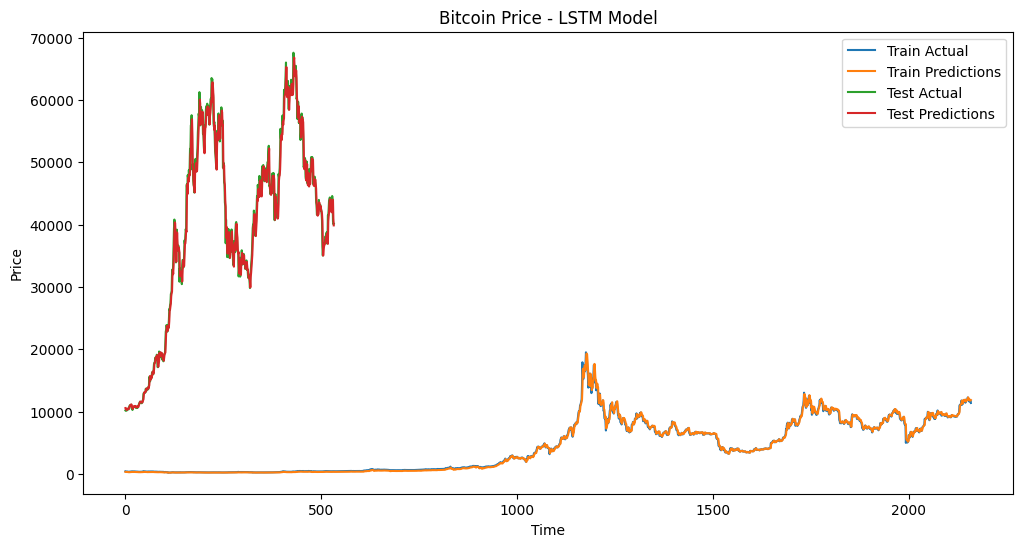

In [ ]:
import matplotlib.pyplot as plt

# Plotting the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(train_actual, label='Train Actual')
plt.plot(train_predictions, label='Train Predictions')
plt.plot(test_actual, label='Test Actual')
plt.plot(test_predictions, label='Test Predictions')
plt.title('Bitcoin Price - LSTM Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


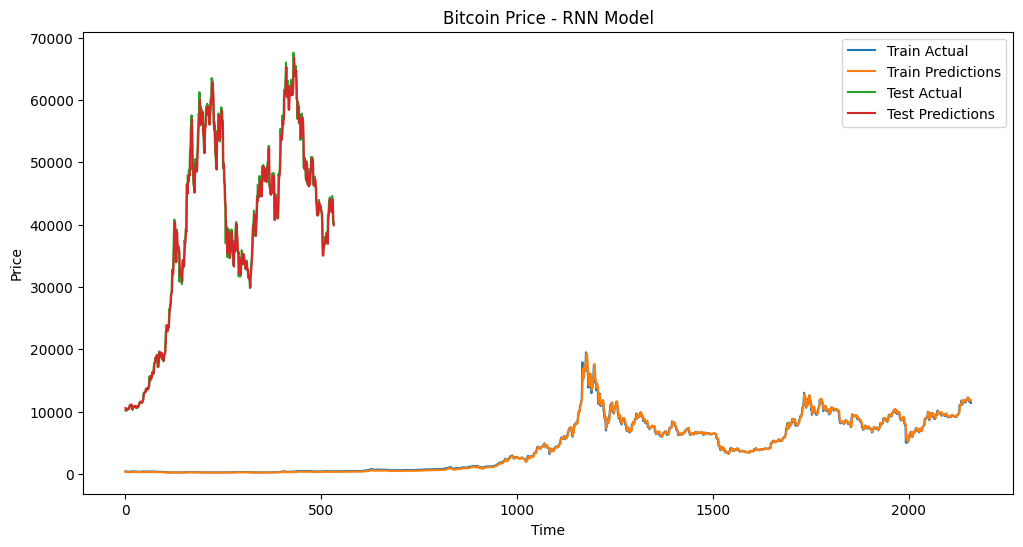

In [ ]:
import matplotlib.pyplot as plt

# Plotting the predictions and actual values for RNN
plt.figure(figsize=(12, 6))
plt.plot(train_actual, label='Train Actual')
plt.plot(train_predictions, label='Train Predictions')
plt.plot(test_actual, label='Test Actual')
plt.plot(test_predictions, label='Test Predictions')
plt.title('Bitcoin Price - RNN Model')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


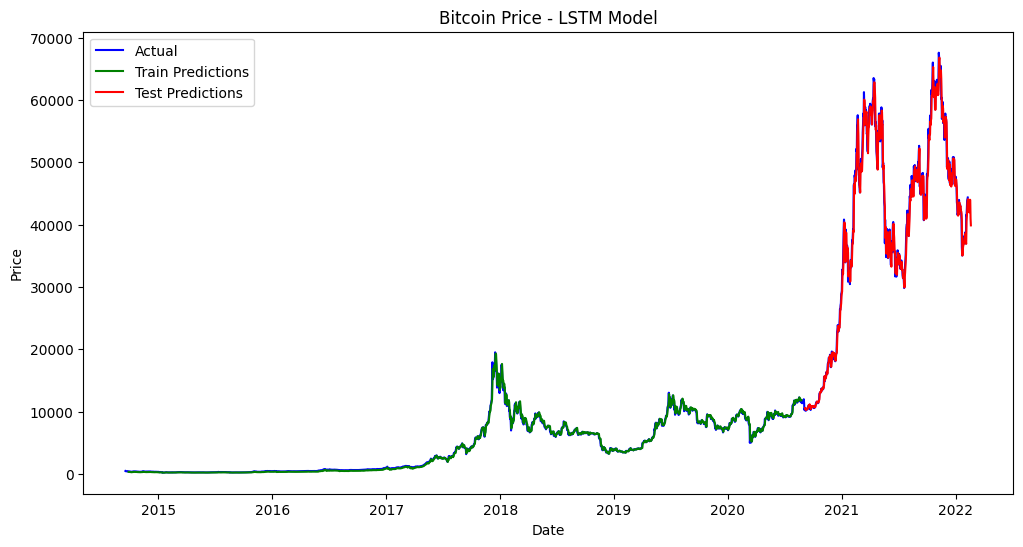

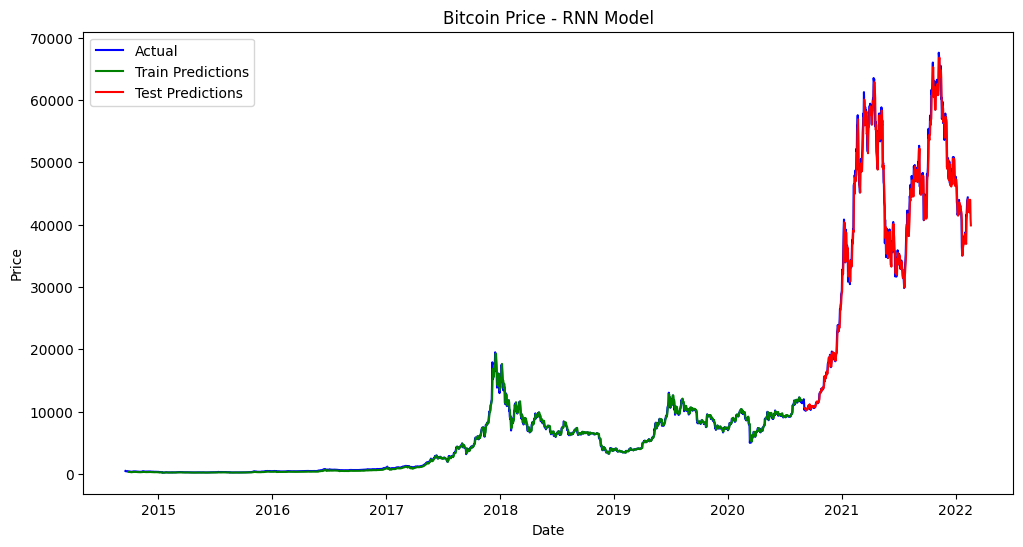

In [ ]:
import matplotlib.pyplot as plt

# LSTM visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index[:-seq_length], data['Close'].values[:-seq_length], color='blue', label='Actual')
plt.plot(data.index[seq_length:train_size], train_predictions, color='green', label='Train Predictions')
plt.plot(data.index[train_size+seq_length:], test_predictions, color='red', label='Test Predictions')
plt.title('Bitcoin Price - LSTM Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# RNN visualization
plt.figure(figsize=(12, 6))
plt.plot(data.index[:-seq_length], data['Close'].values[:-seq_length], color='blue', label='Actual')
plt.plot(data.index[seq_length:train_size], train_predictions, color='green', label='Train Predictions')
plt.plot(data.index[train_size+seq_length:], test_predictions, color='red', label='Test Predictions')
plt.title('Bitcoin Price - RNN Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


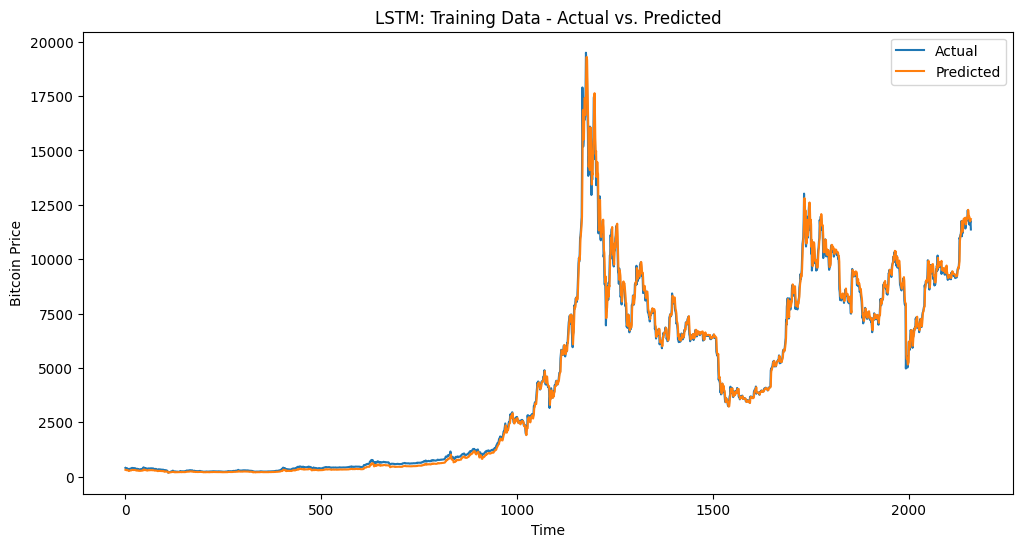

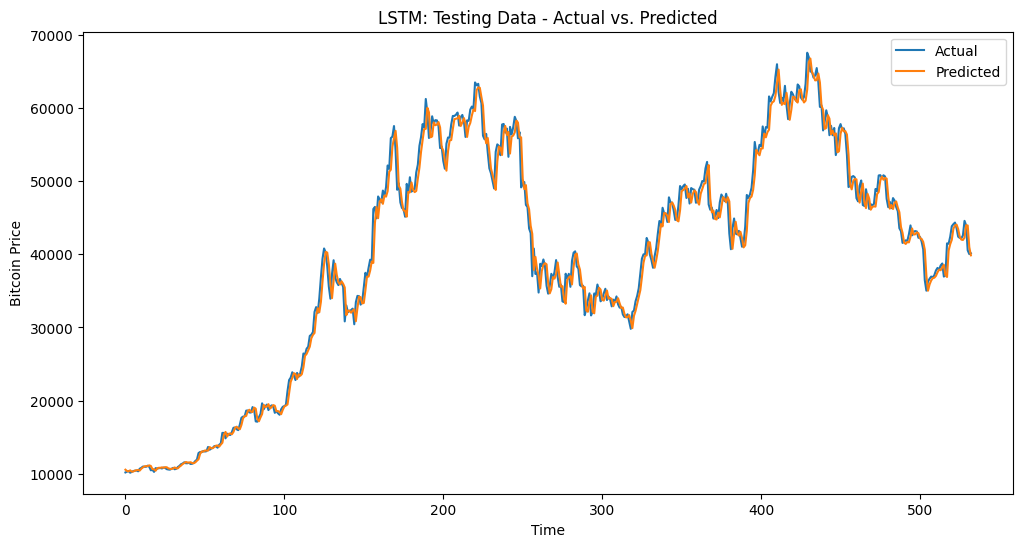

In [ ]:
import matplotlib.pyplot as plt

# Visualize LSTM predictions for training data
plt.figure(figsize=(12, 6))
plt.plot(train_actual, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('LSTM: Training Data - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

# Visualize LSTM predictions for testing data
plt.figure(figsize=(12, 6))
plt.plot(test_actual, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('LSTM: Testing Data - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


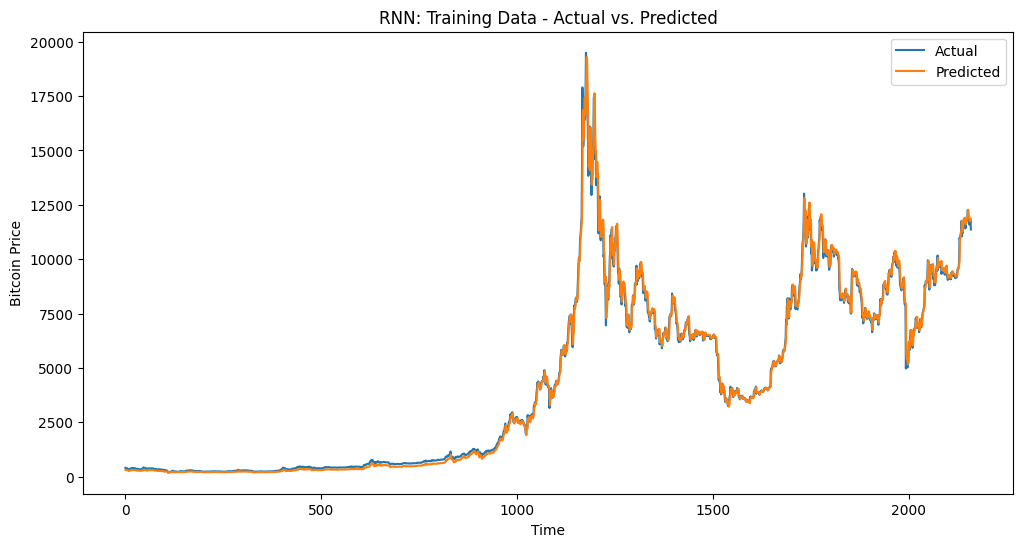

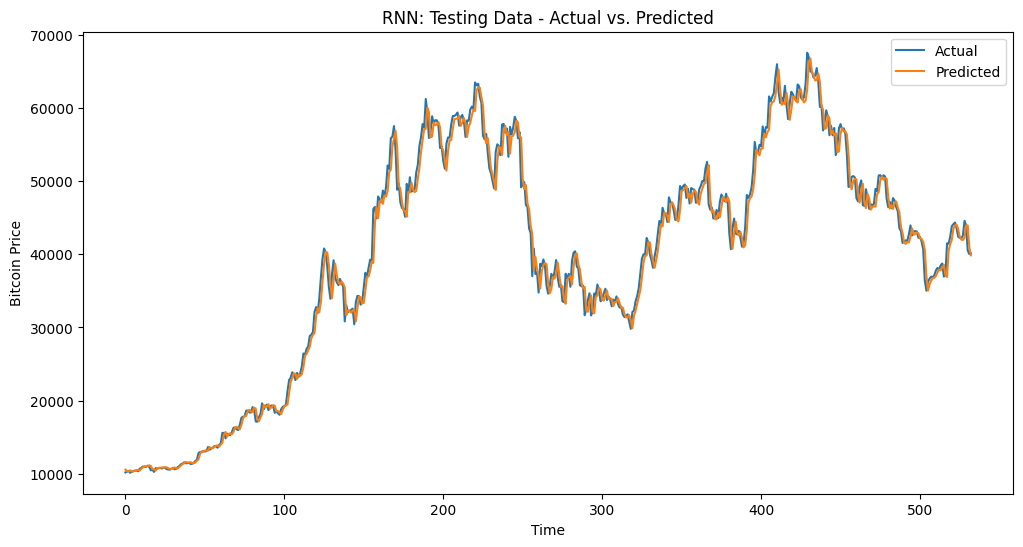

In [ ]:
import matplotlib.pyplot as plt

# Visualize RNN predictions for training data
plt.figure(figsize=(12, 6))
plt.plot(train_actual, label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('RNN: Training Data - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

# Visualize RNN predictions for testing data
plt.figure(figsize=(12, 6))
plt.plot(test_actual, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('RNN: Testing Data - Actual vs. Predicted')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()
